In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [ ]:
data_train = pd.read_csv ("dataset/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
data_train.replace(["female", "male"], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)

In [115]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_train = np.array(data_train[["Survived"]])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [116]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping])


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6727 - loss: 0.6695 - val_accuracy: 0.7598 - val_loss: 0.6074
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7183 - loss: 0.5999 - val_accuracy: 0.7765 - val_loss: 0.5408
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7675 - loss: 0.5485 - val_accuracy: 0.7877 - val_loss: 0.4844
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7548 - loss: 0.5269 - val_accuracy: 0.7877 - val_loss: 0.4596
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7724 - loss: 0.5043 - val_accuracy: 0.7989 - val_loss: 0.4435
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7613 - loss: 0.4974 - val_accuracy: 0.8045 - val_loss: 0.4345
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7862 - loss: 0.4819 - val_accuracy: 0.8101 - val_loss: 0.4268
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7452 - loss: 0.5321 - val_accuracy: 0.8101 

In [ ]:
data_test = pd.read_csv ("dataset/test.csv")
data_target = pd.read_csv('dataset/gender_submission.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [118]:
data_test.replace(["female", "male"], [0, 1], inplace=True)
data_test.fillna(0, inplace=True)
all(data_test['PassengerId'] == data_target['PassengerId'])

True

In [ ]:
X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_test = np.array(data_target[["Survived"]])
X_test = scaler.fit_transform(X_test)

In [120]:
test_result = model.evaluate(X_test, Y_test, batch_size=32)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8760 - loss: 0.3459


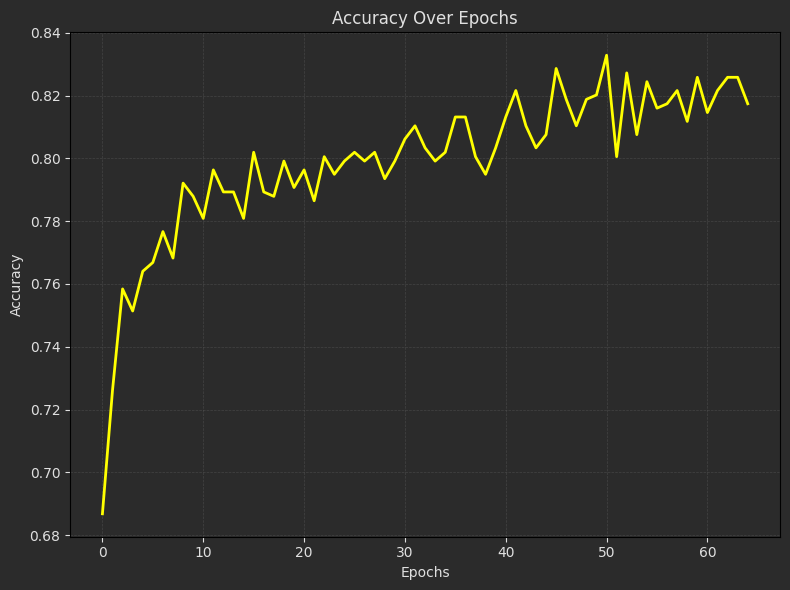

In [132]:
fig, ax = plt.subplots(figsize=(8, 6)) 
fig.patch.set_facecolor('#2b2b2b')  

ax.plot(history.history['accuracy'], color='yellow', linewidth=2)
ax.set_title("Accuracy Over Epochs", color='#e0e0e0')
ax.set_xlabel("Epochs", color='#e0e0e0')
ax.set_ylabel("Accuracy", color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b') 

plt.tight_layout()
plt.show()


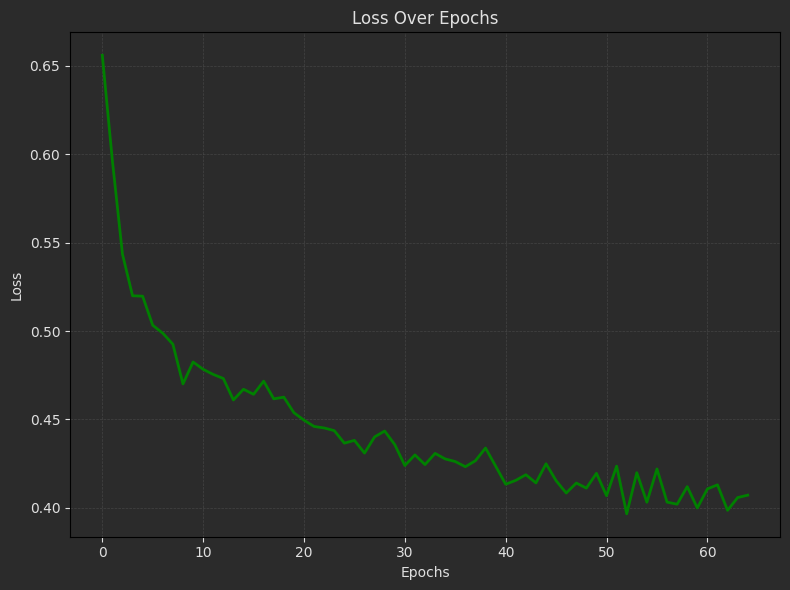

In [131]:
fig, ax = plt.subplots(figsize=(8, 6)) 
fig.patch.set_facecolor('#2b2b2b')  

ax.plot(history.history['loss'], color='green', linewidth=2)
ax.set_title("Loss Over Epochs", color='#e0e0e0')
ax.set_xlabel("Epochs", color='#e0e0e0')
ax.set_ylabel("Loss", color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b') 

plt.tight_layout()
plt.show()


In [127]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.90
Precision: 0.92
Recall: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       266
           1       0.92      0.80      0.85       152

    accuracy                           0.90       418
   macro avg       0.90      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418



In [ ]:
jack = np.array([[3, 1, 20, 1, 1, 5]])
jack = scaler.transform(jack)


rose = np.array([[1, 0, 18, 2, 0, 100]])
rose = scaler.transform(rose)

jack_survival = model.predict(jack)
rose_survival = model.predict(rose)

print(f"Jack's survival probability: {jack_survival[0][1]:.2f}")
print(f"Rose's survival probability: {rose_survival[0][1]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Jack's survival probability: 0.07
Rose's survival probability: 1.00
